<h2><a href="https://leetcode.com/problems/number-of-enclaves/">1020. Number of Enclaves</a></h2><h3>Medium</h3><hr><p>You are given an <code>m x n</code> binary matrix <code>grid</code>, where <code>0</code> represents a sea cell and <code>1</code> represents a land cell.</p>

<p>A <strong>move</strong> consists of walking from one land cell to another adjacent (<strong>4-directionally</strong>) land cell or walking off the boundary of the <code>grid</code>.</p>

<p>Return <em>the number of land cells in</em> <code>grid</code> <em>for which we cannot walk off the boundary of the grid in any number of <strong>moves</strong></em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/02/18/enclaves1.jpg" style="width: 333px; height: 333px;" />
<pre>
<strong>Input:</strong> grid = [[0,0,0,0],[1,0,1,0],[0,1,1,0],[0,0,0,0]]
<strong>Output:</strong> 3
<strong>Explanation:</strong> There are three 1s that are enclosed by 0s, and one 1 that is not enclosed because its on the boundary.
</pre>

<p><strong class="example">Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/02/18/enclaves2.jpg" style="width: 333px; height: 333px;" />
<pre>
<strong>Input:</strong> grid = [[0,1,1,0],[0,0,1,0],[0,0,1,0],[0,0,0,0]]
<strong>Output:</strong> 0
<strong>Explanation:</strong> All 1s are either on the boundary or can reach the boundary.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>m == grid.length</code></li>
	<li><code>n == grid[i].length</code></li>
	<li><code>1 &lt;= m, n &lt;= 500</code></li>
	<li><code>grid[i][j]</code> is either <code>0</code> or <code>1</code>.</li>
</ul>


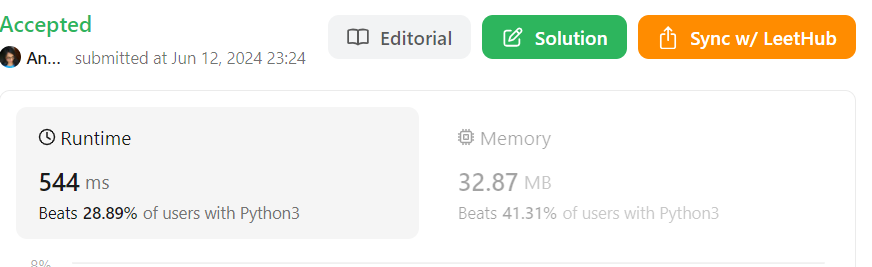

In [1]:
from typing import List

class Solution:
    def numEnclaves(self, grid: List[List[int]]) -> int:
        rows, cols = len(grid), len(grid[0])
        vis = [[0 for _ in range(len(grid[0]))] for _ in range(len(grid))]
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

        def dfs_convert(x, y, grid, vis):
            vis[x][y] = 1           
            for dx, dy in directions:
                if 0 <= x+dx < rows  and 0 <= y +dy < cols and grid[x + dx][y+dy] == 1 and vis[x+dx][y+dy] == 0:
                    dfs_convert(x+dx, y+dy, grid, vis)


        def dfs_count(x, y, grid, vis, count):
            vis[x][y] = 1
            count = 1  
            for dx, dy in directions:
                if 0 < x+dx < rows -1 and 0 < y +dy < cols-1 and grid[x+ dx][y+dy] == 1 and vis[x+dx][y+dy] == 0:
                    count += dfs_count(x+dx, y+dy, grid, vis, count)

            return count


        # Convert all enclaves have 1s at border back to 0 or (mark visited)
        # check verticals
        for i in range(rows):
            if grid[i][0] == 1:
                dfs_convert(i, 0, grid, vis)
            if grid[i][cols -1] == 1:
                dfs_convert(i, cols -1, grid, vis)
        # check horizontals
        for j in range(cols):
            if grid[0][j] == 1:
                dfs_convert(0, j, grid, vis)
            if grid[rows - 1][j] == 1:
                dfs_convert(rows -1 , j, grid, vis)



        total_count = 0
        for i in range(rows):     # Count number of 1s in enclaves
            for j in range(cols):
                if grid[i][j] == 1 and vis[i][j] == 0:
                    total_count += dfs_count(i,j, grid, vis, count) 

        return total_count

# Faster solution , by removing dfs function for counting 
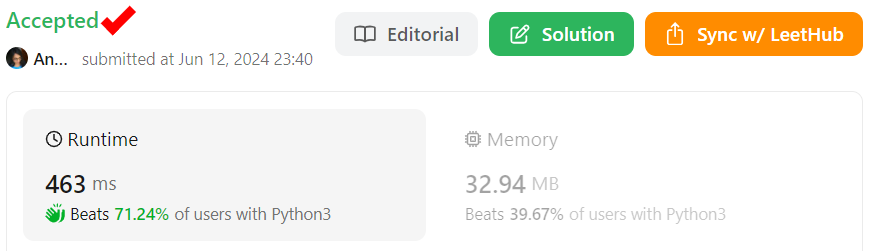

In [2]:
class Solution:
    def numEnclaves(self, grid: List[List[int]]) -> int:
        rows, cols = len(grid), len(grid[0])
        vis = [[0 for _ in range(len(grid[0]))] for _ in range(len(grid))]
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

        def dfs_convert(x, y, grid, vis):
            vis[x][y] = 1
            # grid[x][y] = 0            
            for dx, dy in directions:
                if 0 <= x+dx < rows  and 0 <= y +dy < cols and grid[x + dx][y+dy] == 1 and vis[x+dx][y+dy] == 0:
                    dfs_convert(x+dx, y+dy, grid, vis)


        # def dfs_count(x, y, grid, vis, count):
        #     vis[x][y] = 1
        #     count = 1  
        #     for dx, dy in directions:
        #         if 0 < x+dx < rows -1 and 0 < y +dy < cols-1 and grid[x+ dx][y+dy] == 1 and vis[x+dx][y+dy] == 0:
        #             count += dfs_count(x+dx, y+dy, grid, vis, count)
        #     return count


        # Convert all enclaves have 1s at border back to 0 or (mark visited)
        # check verticals
        for i in range(rows):
            if grid[i][0] == 1:
                dfs_convert(i, 0, grid, vis)
            if grid[i][cols -1] == 1:
                dfs_convert(i, cols -1, grid, vis)
                
        # check horizontals
        for j in range(cols):
            if grid[0][j] == 1:
                dfs_convert(0, j, grid, vis)
            if grid[rows - 1][j] == 1:
                dfs_convert(rows -1 , j, grid, vis)



        total_count = 0
        for i in range(rows):     # Count number of 1s in enclaves
            for j in range(cols):
                if grid[i][j] == 1 and vis[i][j] == 0:
                    # total_count += dfs_count(i,j, grid, vis, count) 
                    total_count += 1

        return total_count